[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10
184/184 [==============================] - 23s 94ms/step - loss: 1.9169 - accuracy: 0.2551 - val_loss: 1.6042 - val_accuracy: 0.2180
Epoch 2/10
184/184 [==============================] - 18s 97ms/step - loss: 1.6030 - accuracy: 0.2405 - val_loss: 1.6113 - val_accuracy: 0.2153
Epoch 3/10
184/184 [==============================] - 19s 101ms/step - loss: 1.6006 - accuracy: 0.2425 - val_loss: 1.6013 - val_accuracy: 0.2180
Epoch 4/10
184/184 [==============================] - 16s 86ms/step - loss: 1.5996 - accuracy: 0.2480 - val_loss: 1.5889 - val_accuracy: 0.2807
Epoch 5/10
184/184 [==============================] - 18s 96ms/step - loss: 1.6011 - accuracy: 0.2463 - val_loss: 1.5948 - val_accuracy: 0.2752
Epoch 6/10
184/184 [==============================] - 17s 93ms/step - loss: 1.6016 - accuracy: 0.2425 - val_loss: 1.5961 - val_accuracy: 0.2480
Epoch 7/10
184/184 [==============================] - 17s 92ms/step 

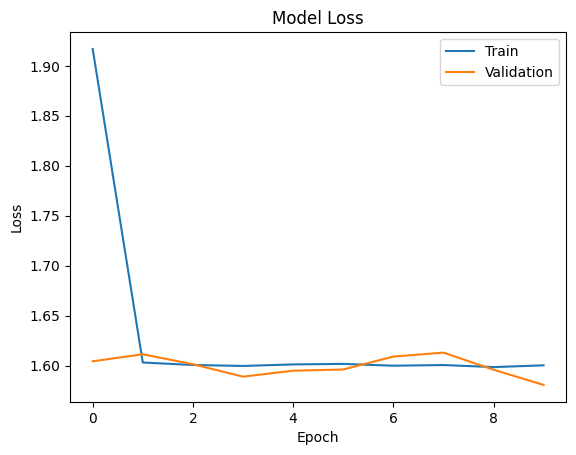

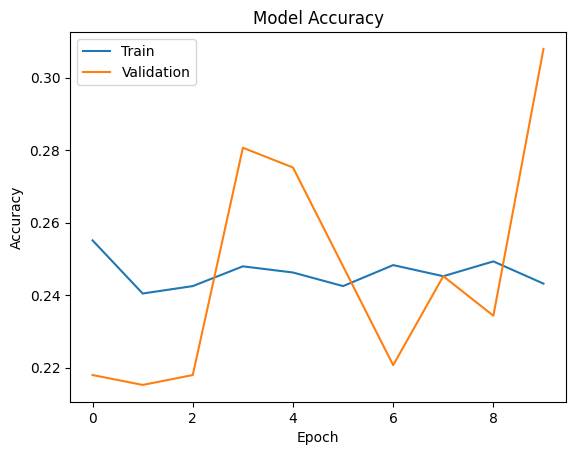

In [6]:
# tranfer learning sample 1
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Print the list of available physical devices
print(tf.config.list_physical_devices('GPU'))

# Load the tf_flowers dataset
train_data_full, info = tfds.load(
    'tf_flowers',
    split='train',
    with_info=True,
    as_supervised=True
)

# Calculate the number of samples in the dataset
num_samples = tf.data.experimental.cardinality(train_data_full).numpy()

# Shuffle the dataset
train_data_full = train_data_full.shuffle(num_samples, seed=42)

# Calculate the number of samples for training, validation, and test sets
num_train_samples = int(0.8 * num_samples)
num_val_samples = int(0.1 * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# Split the dataset into training, validation, and test sets
train_data = train_data_full.take(num_train_samples)
val_data = train_data_full.skip(num_train_samples).take(num_val_samples)
test_data = train_data_full.skip(num_train_samples + num_val_samples)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_data = train_data.map(preprocess).batch(16)
val_data = val_data.map(preprocess).batch(16)
test_data = test_data.map(preprocess).batch(16)

# Load the pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the layers except the last three fully connected layers
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Create the transfer model
transfer_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define the number of epochs
epochs = 10

# Train the model
history = transfer_model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

# Calculate predictions on the test set
test_images = []
test_labels = []
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
predictions = np.argmax(transfer_model.predict(test_images), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model on the test set
test_loss, test_accuracy = transfer_model.evaluate(test_data)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the loss for both training and validation sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot the accuracy for both training and validation sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/20
92/92 [==============================] - 21s 174ms/step - loss: 2.2608 - accuracy: 0.2354 - val_loss: 1.6043 - val_accuracy: 0.2180
Epoch 2/20
92/92 [==============================] - 15s 167ms/step - loss: 1.6030 - accuracy: 0.2418 - val_loss: 1.6108 - val_accuracy: 0.2153
Epoch 3/20
92/92 [==============================] - 16s 173ms/step - loss: 1.6006 - accuracy: 0.2425 - val_loss: 1.6013 - val_accuracy: 0.2180
Epoch 4/20
92/92 [==============================] - 15s 163ms/step - loss: 1.5994 - accuracy: 0.2480 - val_loss: 1.5894 - val_accuracy: 0.2807
Epoch 5/20
92/92 [==============================] - 15s 164ms/step - loss: 1.6008 - accuracy: 0.2463 - val_loss: 1.5947 - val_accuracy: 0.2752
Epoch 6/20
92/92 [==============================] - 15s 166ms/step - loss: 1.6014 - accuracy: 0.2425 - val_loss: 1.5960 - val_accuracy: 0.2480
Epoch 7/20
92/92 [==============================] - 15s 163ms/step - loss: 

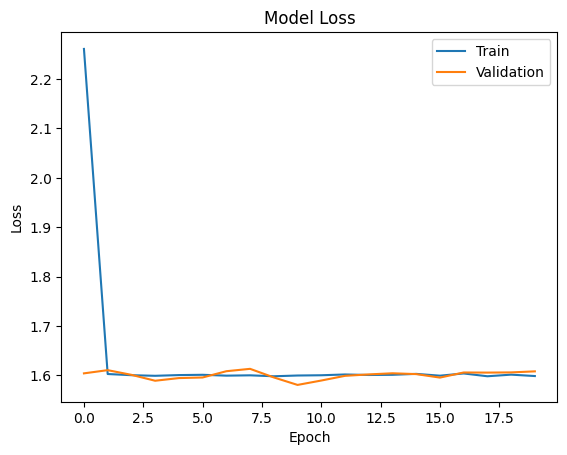

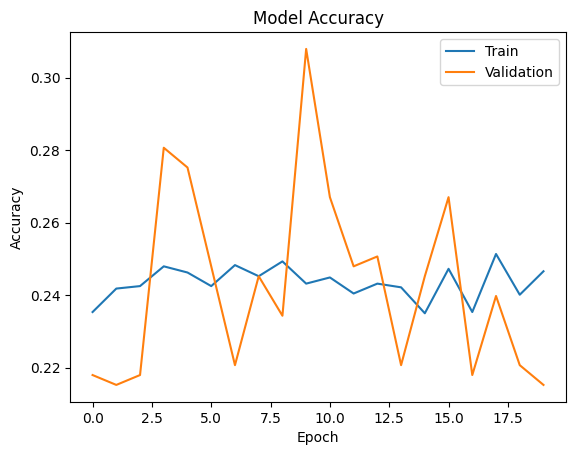

In [7]:
#transfer learning sample 2
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Print the list of available physical devices
print(tf.config.list_physical_devices('GPU'))

# Load the tf_flowers dataset
train_data_full, info = tfds.load(
    'tf_flowers',
    split='train',
    with_info=True,
    as_supervised=True
)

# Calculate the number of samples in the dataset
num_samples = tf.data.experimental.cardinality(train_data_full).numpy()

# Shuffle the dataset
train_data_full = train_data_full.shuffle(num_samples, seed=42)

# Calculate the number of samples for training, validation, and test sets
num_train_samples = int(0.8 * num_samples)
num_val_samples = int(0.1 * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# Split the dataset into training, validation, and test sets
train_data = train_data_full.take(num_train_samples)
val_data = train_data_full.skip(num_train_samples).take(num_val_samples)
test_data = train_data_full.skip(num_train_samples + num_val_samples)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_data = train_data.map(preprocess).batch(32)
val_data = val_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

# Load the pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the layers except the last three fully connected layers
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Create the transfer model
transfer_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define the number of epochs
epochs = 20

# Train the model
history = transfer_model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

# Calculate predictions on the test set
test_images = []
test_labels = []
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
predictions = np.argmax(transfer_model.predict(test_images), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model on the test set
test_loss, test_accuracy = transfer_model.evaluate(test_data)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the loss for both training and validation sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot the accuracy for both training and validation sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10
184/184 [==============================] - 63s 247ms/step - loss: 2.9035 - accuracy: 0.3232 - val_loss: 1.3723 - val_accuracy: 0.4142
Epoch 2/10
184/184 [==============================] - 42s 226ms/step - loss: 1.2546 - accuracy: 0.4840 - val_loss: 1.1150 - val_accuracy: 0.5286
Epoch 3/10
184/184 [==============================] - 41s 222ms/step - loss: 1.1038 - accuracy: 0.5634 - val_loss: 1.0685 - val_accuracy: 0.5313
Epoch 4/10
184/184 [==============================] - 41s 222ms/step - loss: 1.0588 - accuracy: 0.5817 - val_loss: 0.8876 - val_accuracy: 0.6594
Epoch 5/10
184/184 [==============================] - 41s 222ms/step - loss: 1.0214 - accuracy: 0.6012 - val_loss: 0.9692 - val_accuracy: 0.6076
Epoch 6/10
184/184 [==============================] - 42s 229ms/step - loss: 1.0077 - accuracy: 0.6138 - val_loss: 0.9354 - val_accuracy: 0.6594
Epoch 7/10
184/184 [==============================] - 41s 222ms

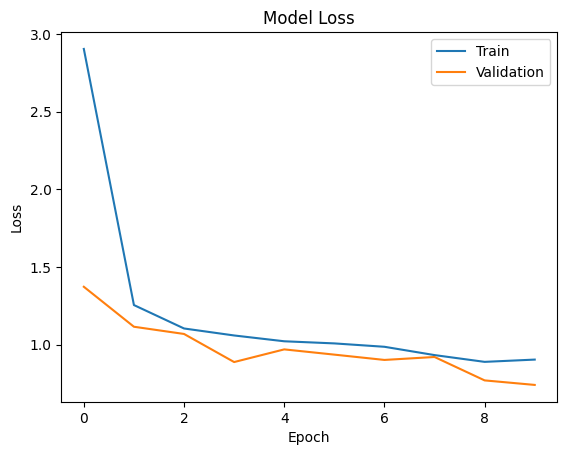

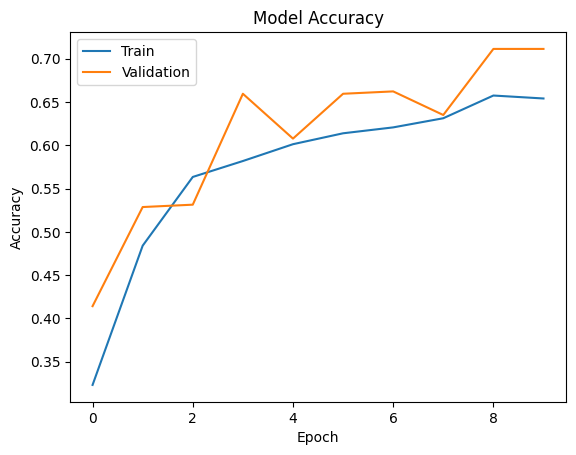

In [3]:
# train whole vgg16 model sample 1
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Print the list of available physical devices
print(tf.config.list_physical_devices('GPU'))

# Load the tf_flowers dataset
train_data_full, info = tfds.load(
    'tf_flowers',
    split='train',
    with_info=True,
    as_supervised=True
)

# Calculate the number of samples in the dataset
num_samples = tf.data.experimental.cardinality(train_data_full).numpy()

# Shuffle the dataset
train_data_full = train_data_full.shuffle(num_samples, seed=42)

# Calculate the number of samples for training, validation, and test sets
num_train_samples = int(0.8 * num_samples)
num_val_samples = int(0.1 * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# Split the dataset into training, validation, and test sets
train_data = train_data_full.take(num_train_samples)
val_data = train_data_full.skip(num_train_samples).take(num_val_samples)
test_data = train_data_full.skip(num_train_samples + num_val_samples)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_data = train_data.map(preprocess).batch(16)
val_data = val_data.map(preprocess).batch(16)
test_data = test_data.map(preprocess).batch(16)

# Load the pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Create the transfer model
transfer_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define the number of epochs
epochs = 10

# Train the model
history = transfer_model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

# Calculate predictions on the test set
test_images = []
test_labels = []
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
predictions = np.argmax(transfer_model.predict(test_images), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model on the test set
test_loss, test_accuracy = transfer_model.evaluate(test_data)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the loss for both training and validation sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot the accuracy for both training and validation sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/20
92/92 [==============================] - 48s 434ms/step - loss: 3.6248 - accuracy: 0.2459 - val_loss: 1.5756 - val_accuracy: 0.2834
Epoch 2/20
92/92 [==============================] - 38s 416ms/step - loss: 1.5172 - accuracy: 0.3151 - val_loss: 1.5036 - val_accuracy: 0.3379
Epoch 3/20
92/92 [==============================] - 38s 413ms/step - loss: 1.4227 - accuracy: 0.3648 - val_loss: 1.2186 - val_accuracy: 0.4714
Epoch 4/20
92/92 [==============================] - 38s 416ms/step - loss: 1.1865 - accuracy: 0.5184 - val_loss: 1.2065 - val_accuracy: 0.5095
Epoch 5/20
92/92 [==============================] - 40s 430ms/step - loss: 1.0870 - accuracy: 0.5579 - val_loss: 0.9775 - val_accuracy: 0.6294
Epoch 6/20
92/92 [==============================] - 40s 433ms/step - loss: 1.0454 - accuracy: 0.5800 - val_loss: 0.9852 - val_accuracy: 0.6158
Epoch 7/20
92/92 [==============================] - 39s 420ms/step - loss: 

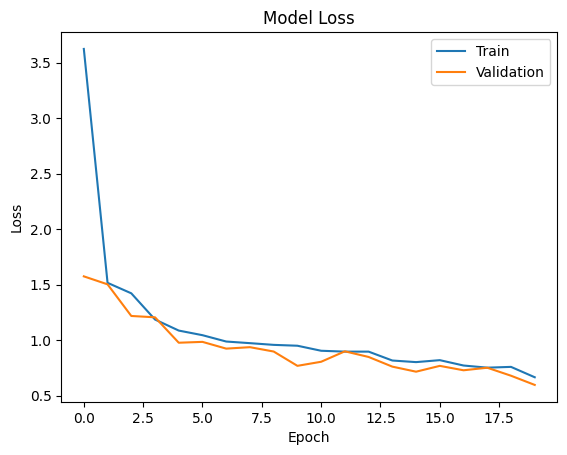

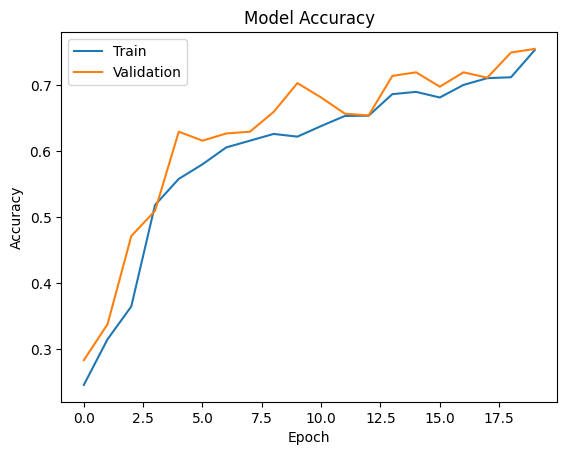

In [8]:
# train whole vgg16 model sample 2
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Print the list of available physical devices
print(tf.config.list_physical_devices('GPU'))

# Load the tf_flowers dataset
train_data_full, info = tfds.load(
    'tf_flowers',
    split='train',
    with_info=True,
    as_supervised=True
)

# Calculate the number of samples in the dataset
num_samples = tf.data.experimental.cardinality(train_data_full).numpy()

# Shuffle the dataset
train_data_full = train_data_full.shuffle(num_samples, seed=42)

# Calculate the number of samples for training, validation, and test sets
num_train_samples = int(0.8 * num_samples)
num_val_samples = int(0.1 * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# Split the dataset into training, validation, and test sets
train_data = train_data_full.take(num_train_samples)
val_data = train_data_full.skip(num_train_samples).take(num_val_samples)
test_data = train_data_full.skip(num_train_samples + num_val_samples)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_data = train_data.map(preprocess).batch(32)
val_data = val_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

# Load the pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Create the transfer model
transfer_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define the number of epochs
epochs = 20

# Train the model
history = transfer_model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

# Calculate predictions on the test set
test_images = []
test_labels = []
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
predictions = np.argmax(transfer_model.predict(test_images), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model on the test set
test_loss, test_accuracy = transfer_model.evaluate(test_data)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the loss for both training and validation sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot the accuracy for both training and validation sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()